#**Install Requirement Library**

In [1]:
!pip install anytree
!pip install basemap
!pip install mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 117.3 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3851 sha256=265d356d2e0503bd7c03afc7edd0bdab0a7918973faefbe0f9a05501b9e8a381
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


#**Import Library**

In [2]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [3]:
#from google.colab import drive
#drive.mount("/content/drive")

#jika dari dataset github
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/eq_1970_M6.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,place
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww,"1km E of Kampungbaru, Indonesia"
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww,"80km WNW of Bouvet Island, Bouvet Island"
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww,"63km NNE of Kerman, Iran"
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww,"53km NNE of Kerman, Iran"
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww,"50km NW of Fais, Micronesia"


#**Gambaran Secara Statistik Kejadian Gempa**

In [4]:
# Total kejadian gempa
N_tot = df['mag'].count()
print('Total Kejadian Gempa sejak **1970 hingga 2017**', N_tot)
print('Rata-rata jumlah kejadian per pekan:', round(N_tot/(52*(2017-1970+1)),2) )
print('Rata-rata jumlah kejadian per tahun:', round(N_tot/((2017-1970+1)),2) )

# Daftar Kejadian gempa terbesar
print('Manitudo gempa terbesar:')
df[['mag','time','place']].sort_values('mag',ascending=False).head(5)

Total Kejadian Gempa sejak **1970 hingga 2017** 6714
Rata-rata jumlah kejadian per pekan: 2.69
Rata-rata jumlah kejadian per tahun: 139.88
Manitudo gempa terbesar:


,mag,time,place
1001,9.1,2011-03-11T05:46:24.120Z,"near the east coast of Honshu, Japan"
2069,9.1,2004-12-26T00:58:53.450Z,off the west coast of northern Sumatra
1192,8.8,2010-02-27T06:34:11.530Z,"offshore Bio-Bio, Chile"
797,8.6,2012-04-11T08:38:36.720Z,off the west coast of northern Sumatra
2002,8.6,2005-03-28T16:09:36.530Z,"northern Sumatra, Indonesia"


**Statistik jumlah kejadian gempa setiap tahunnya**

In [5]:
#Object Date Time
df['dt_time'] = df['time'].apply(lambda x:
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Column year, month, and day
df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
df['dofy'] = df['dofy'].astype(str).astype(int)

df['year'] = df['dt_time'].apply(lambda x: x.year)
df['month'] = df['dt_time'].apply(lambda x: x.month)
df['day'] = df['dt_time'].apply(lambda x: x.day)

# Menghitung jumlah kejadian gempa per waktu (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Menghitung rata-rata kejadian gempa per waktu (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()

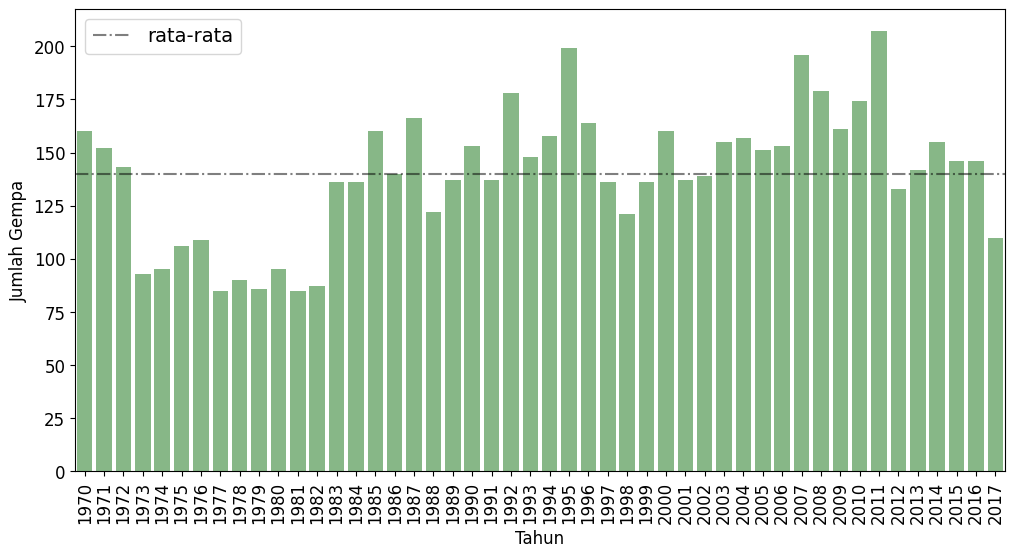

In [6]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='rata-rata')
plt.xlabel('Tahun'), plt.ylabel('Jumlah Gempa')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

**Distribusi Kejadian Gempa dalam 365 Hari (di setiap tahunnya)**

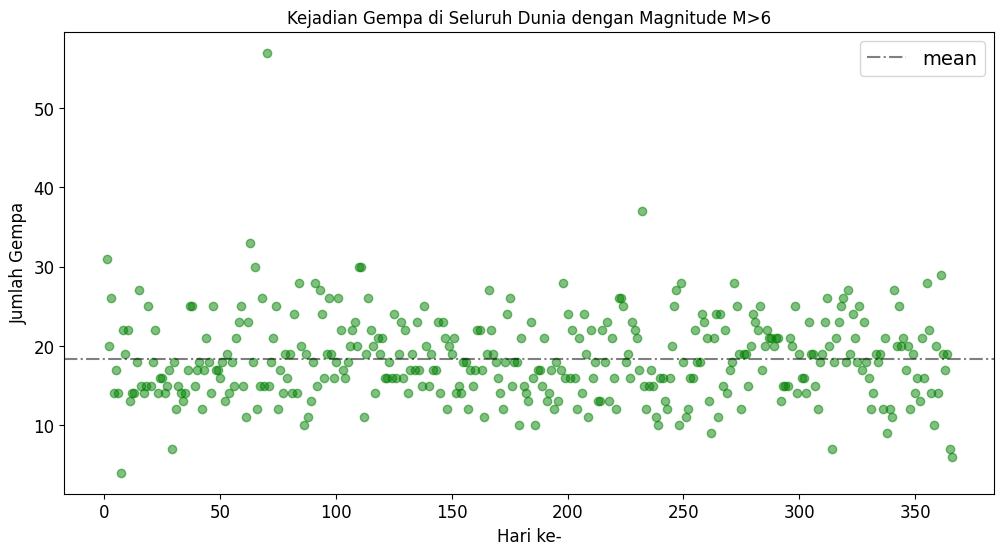

In [7]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Jumlah Gempa'), plt.xlabel('Hari ke-')
plt.title('Kejadian Gempa di Seluruh Dunia dengan Magnitude M>6')
plt.legend()
plt.show()

**Distribusi Kejadian Gempa dalam setiap bulannya (12 Bulan tiap Tahun)**

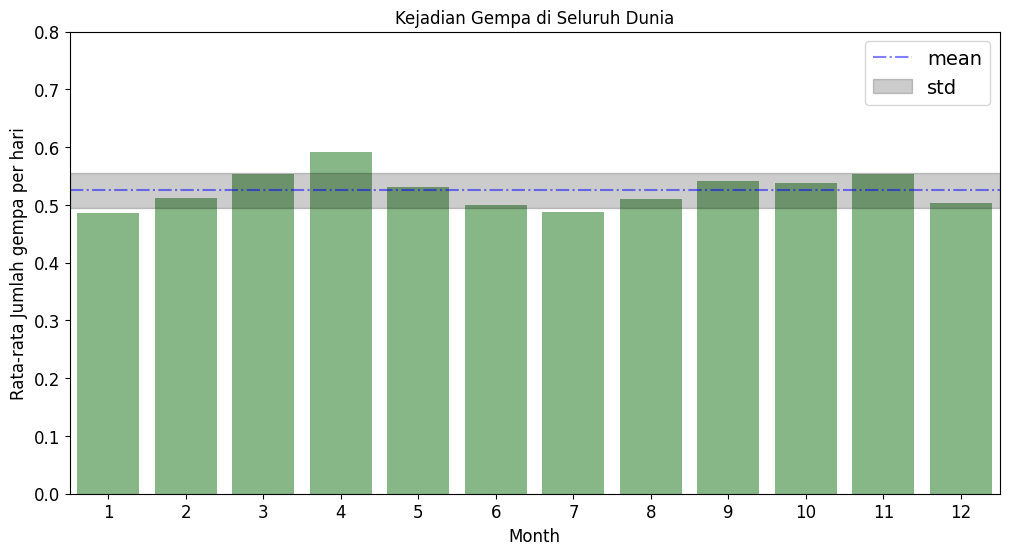

In [8]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 0.8])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Rata-rata Jumlah gempa per hari'), plt.xlabel('Month')
plt.title('Kejadian Gempa di Seluruh Dunia')
plt.legend()
plt.show()

#**Visualisasi Lokasi Gempa**

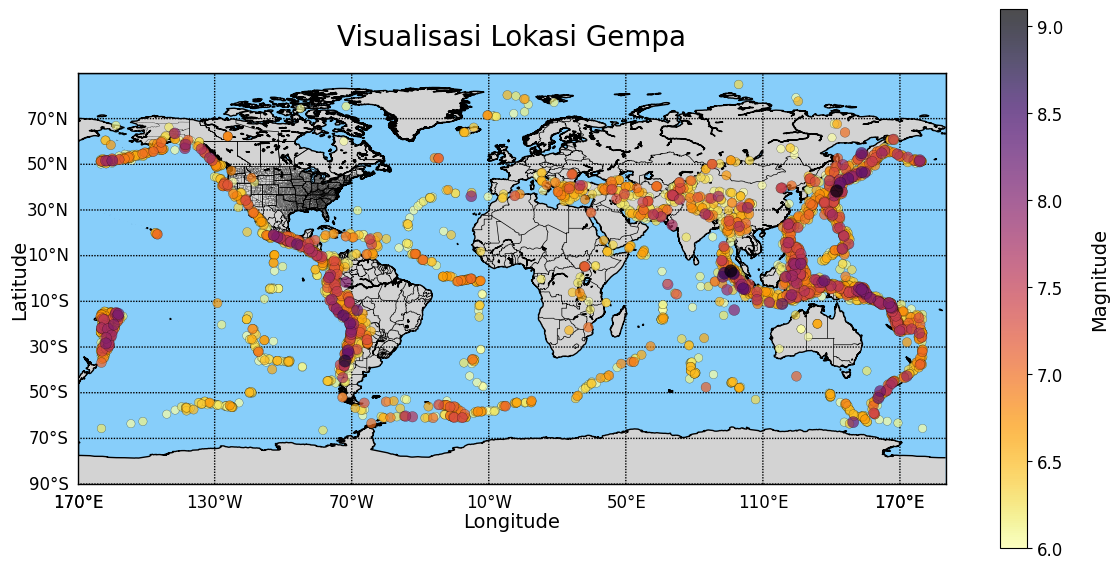

In [9]:
df = df.sort_values(by=['mag'])

fig, ax = plt.subplots(figsize=(14,7))
extent = [-190,190,-90,90]

# Proyeksi ke map
my_map = Basemap(
    projection='cyl',
    resolution = 'l',
    #fix_aspect=True, ax=ax,
    llcrnrlon=extent[0], llcrnrlat=extent[2],
    urcrnrlon=extent[1], urcrnrlat=extent[3])

#my_map = Basemap(projection='merc', resolution='i',
#            lat_0=87.0238, lon_0=174.2179,
#            width=1.05E6, height=1.2E6)

my_map.drawcoastlines() # basic
my_map.fillcontinents(color='lightgrey',lake_color='lightskyblue') # distinguish continents and oceans
my_map.drawcountries() # distinguish the USA and Mexico
my_map.drawmapboundary(fill_color='lightskyblue') # ocean
my_map.drawstates() # distinguish states of the USA
my_map.drawcounties() # distinguish counties of the states of the USA

# draw parallels and meridians
my_map.drawparallels(np.arange(-90,90,20), labels=[1,0,0,0])
my_map.drawmeridians(np.arange(-190,190,60), labels=[0,0,0,1])

magn = 3

# conversion of latitude and longitude
lon = df['longitude'][df['mag']>magn]
lat = df['latitude'][df['mag']>magn]
depth = df['depth'][df['mag']>magn]
xm, ym = my_map(lon, lat)

# 2D plot
xy2d = my_map.scatter(xm, ym,
                      s=df['mag'][df['mag']>magn]**2,
                      c=df["mag"][df['mag']>magn],
                      cmap='inferno_r', edgecolor='k', linewidth=0.2, alpha=0.7,
                      zorder=2)

# colorbar, title and axes
cb = plt.colorbar(xy2d, ax=ax)
cb.set_label(label='Magnitude', fontsize=14, labelpad=20)
ax.set_title('Visualisasi Lokasi Gempa'.format(magn), fontsize=20, pad=20)
ax.set_xlabel('Longitude', fontsize=14, labelpad=20)
ax.set_ylabel('Latitude', fontsize=14, labelpad=35)

plt.show()

df = df.sort_values(by=['time'])

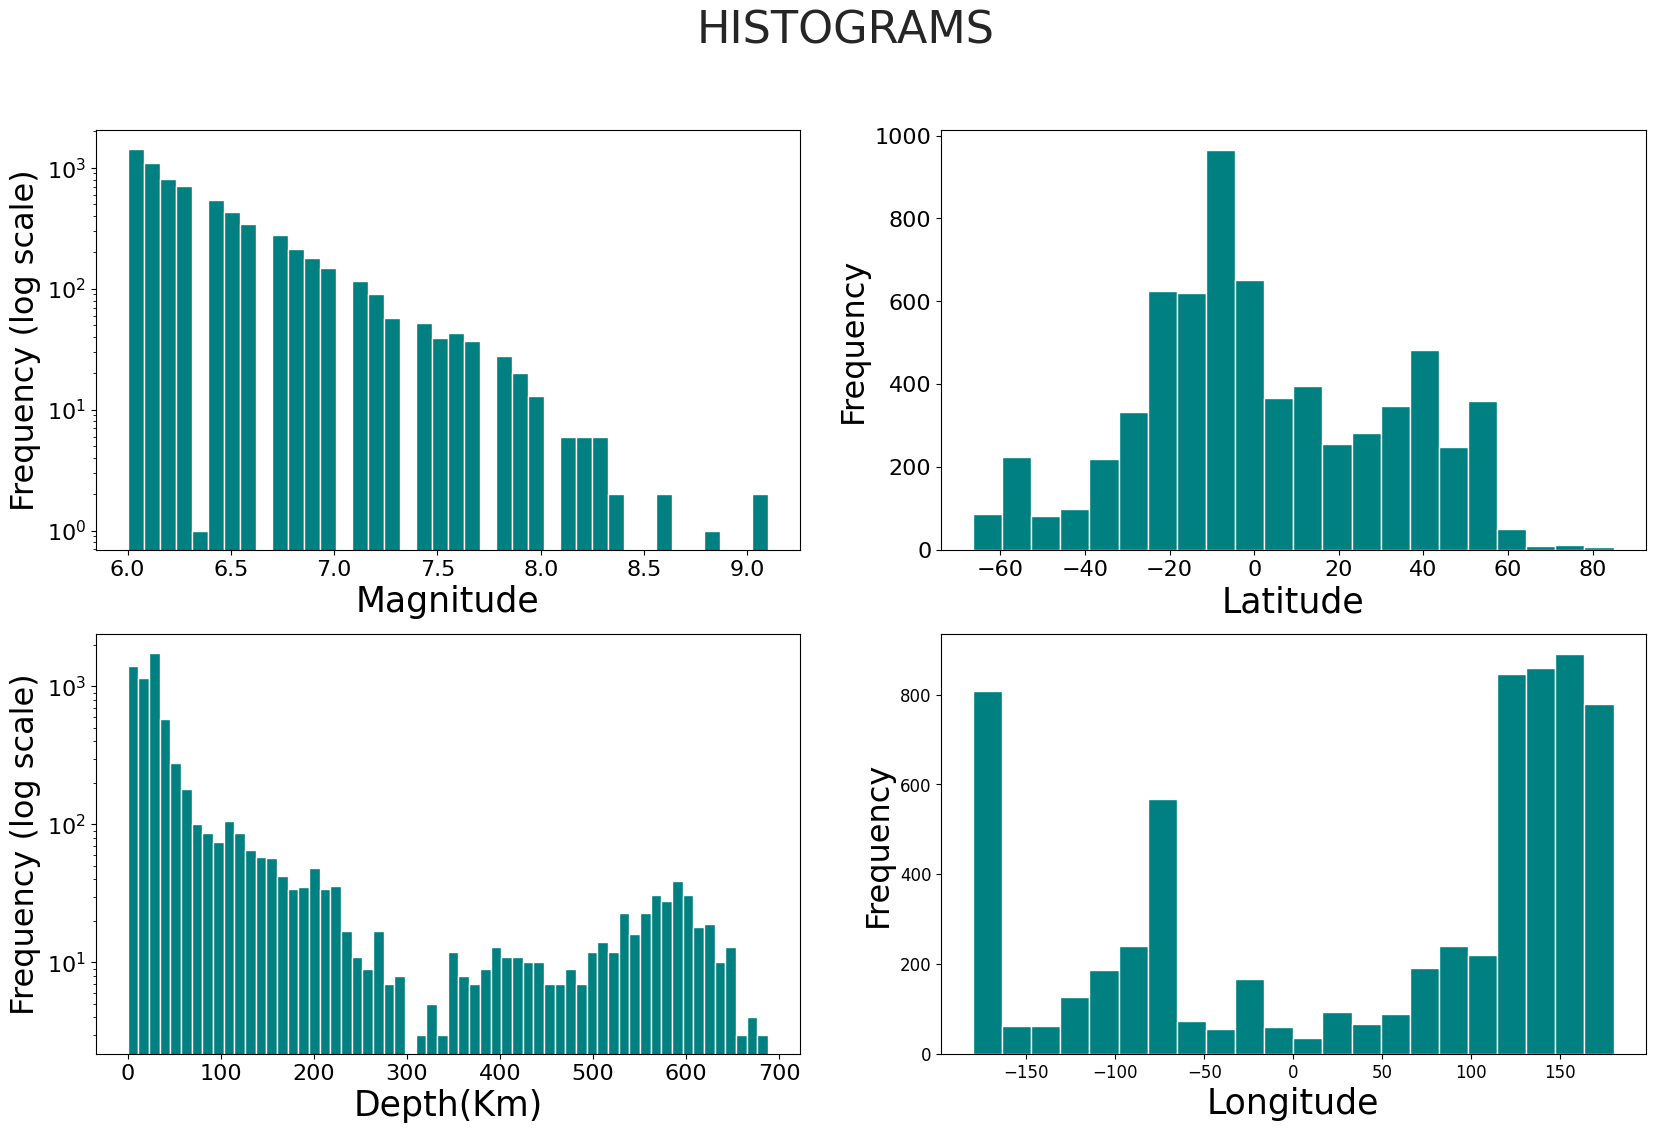

In [10]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(df['mag'],bins=40,color='teal')
axes[1][0].hist(df['depth'],bins=60,color='teal')
axes[0][1].hist(df['latitude'],bins=22,color='teal')
axes[1][1].hist(df['longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)

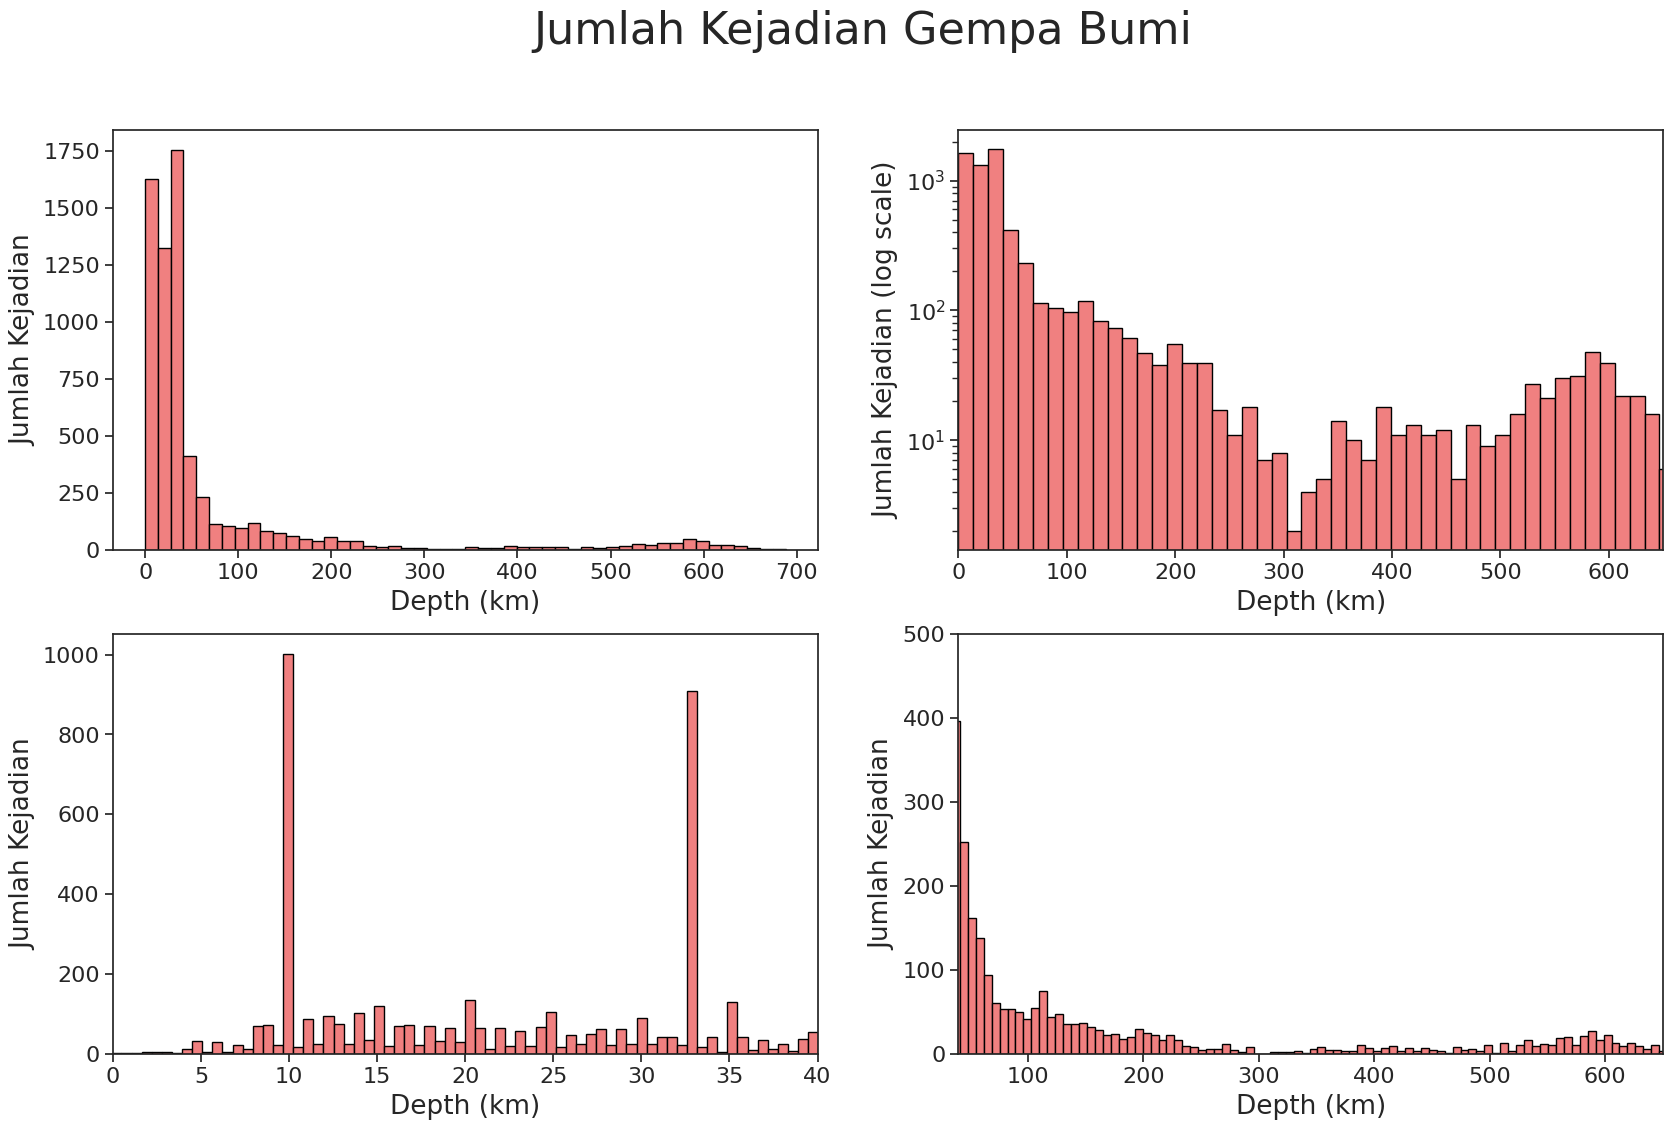

In [11]:
counter=pd.Series([1 for i in range(len(df['time']))])
counter.name='Count'
b=pd.concat([df,pd.Series(counter)],axis=1)
tim=b['Count'].groupby(b['time'])
tim_sum=pd.Series(tim.sum())
df['time']=pd.to_datetime(df['time'])

fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('Jumlah Kejadian Gempa Bumi',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(b['depth'],edgecolor='black', color='lightcoral',bins=50)
axes[1][0].hist(b['depth'],edgecolor='black', color='lightcoral',bins=1200)
axes[0][1].hist(b['depth'],edgecolor='black', color='lightcoral',bins=50)
axes[1][1].hist(b['depth'],edgecolor='black', color='lightcoral',bins=100)
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('Jumlah Kejadian',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('Jumlah Kejadian',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16)
            ax.set_xlim(0,40)
        elif i == 0 and j==1:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('Jumlah Kejadian (log scale)',fontsize=19,labelpad=5)
            ax.set_yscale('log')
            ax.set_xlim(0,650)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('Jumlah Kejadian',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16)
            ax.set_xlim(40,650)
            ax.set_ylim(0,500)

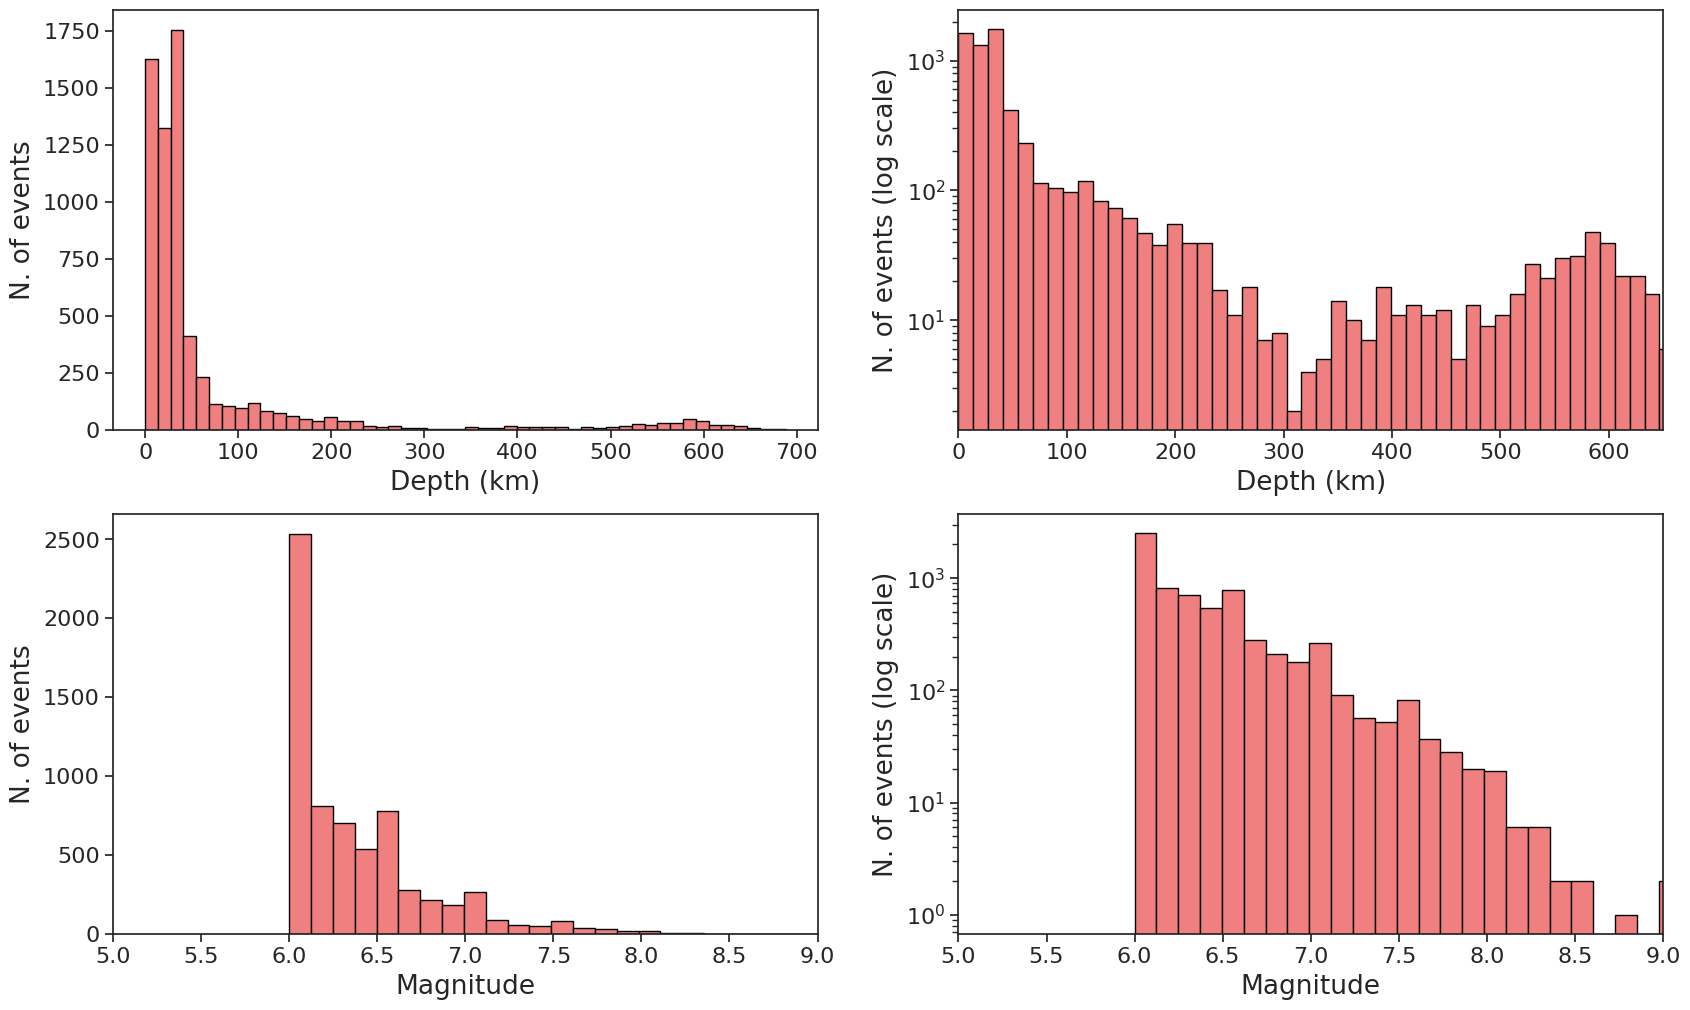

In [12]:
counter=pd.Series([1 for i in range(len(df['time']))])
counter.name='Count'
b=pd.concat([df,pd.Series(counter)],axis=1)
tim=b['Count'].groupby(b['time'])
tim_sum=pd.Series(tim.sum())
df['time']=pd.to_datetime(df['time'])

fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
#fig.suptitle('Number of earthquakes $\geq$ 1.5 by depth',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(b['depth'],edgecolor='black', color='lightcoral',bins=50)
axes[1][0].hist(b['mag'],edgecolor='black', color='lightcoral',bins=25)
axes[0][1].hist(b['depth'],edgecolor='black', color='lightcoral',bins=50)
axes[1][1].hist(b['mag'],edgecolor='black', color='lightcoral',bins=25)
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 0 and j==1:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events (log scale)',fontsize=19,labelpad=5)
            ax.set_yscale('log')
            ax.set_xlim(0,650)
            ax.tick_params(labelsize=16)
        elif i == 1 and j==0:
            ax.set_xlabel('Magnitude',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events',fontsize=19,labelpad=5)
            ax.set_xlim(5,9)
            ax.tick_params(labelsize=16)
        elif i == 1 and j==1:
            ax.set_xlabel('Magnitude',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events (log scale)',fontsize=19,labelpad=5)
            ax.set_yscale('log')
            ax.set_xlim(5,9)
            ax.tick_params(labelsize=16)


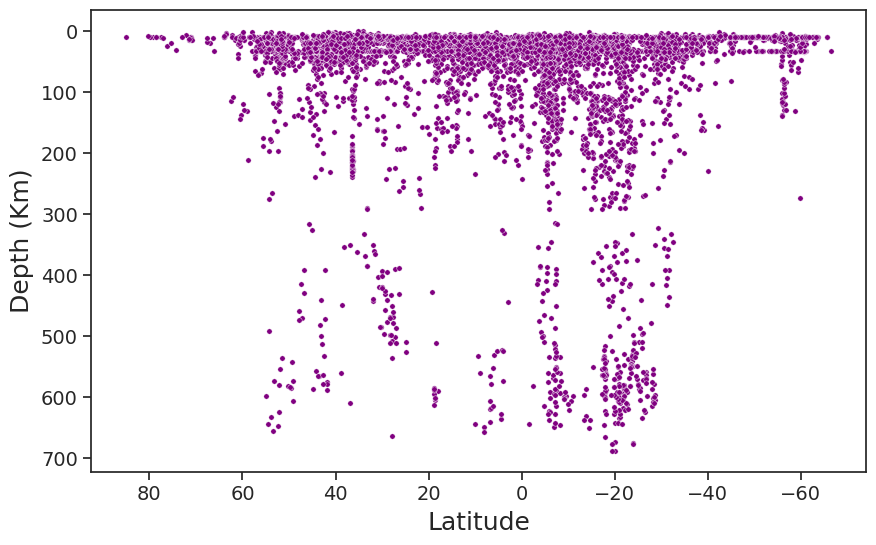

In [13]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

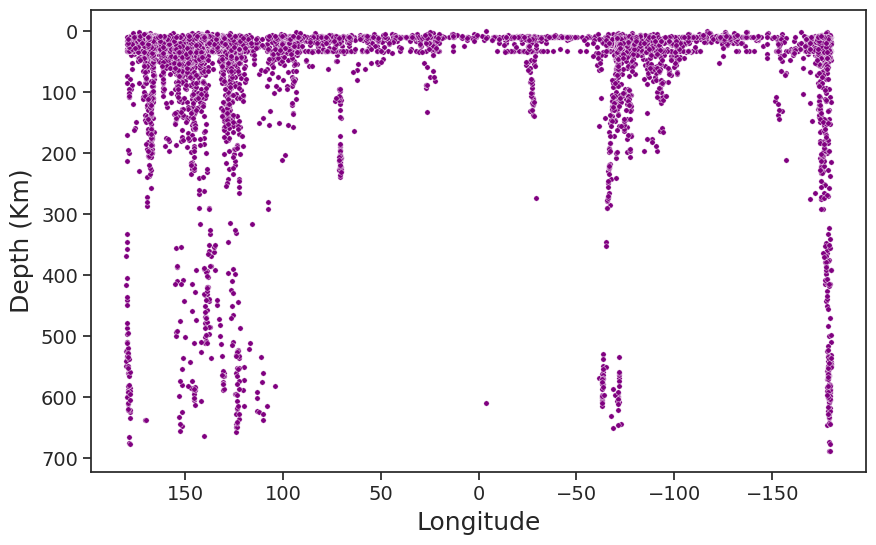

In [14]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

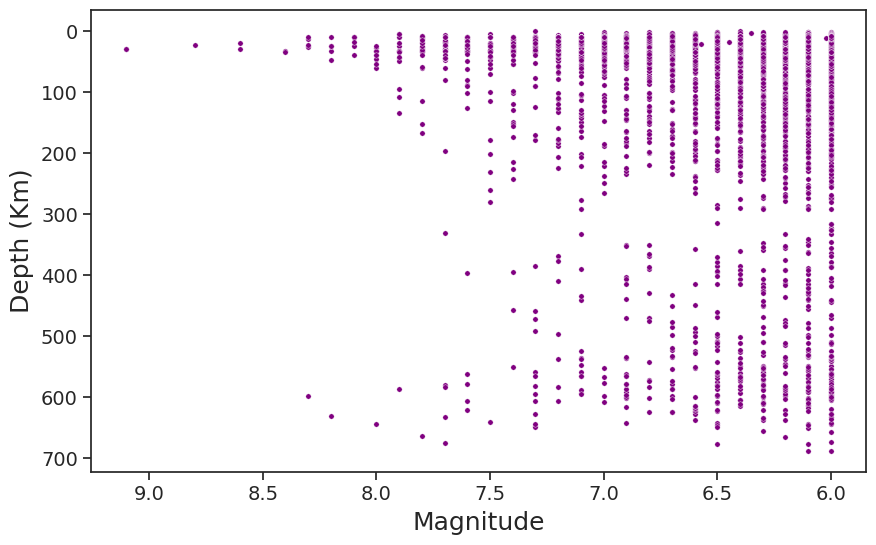

In [15]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['mag'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Magnitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize